In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [ ]:
df.shape

(2000, 7)

In [ ]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

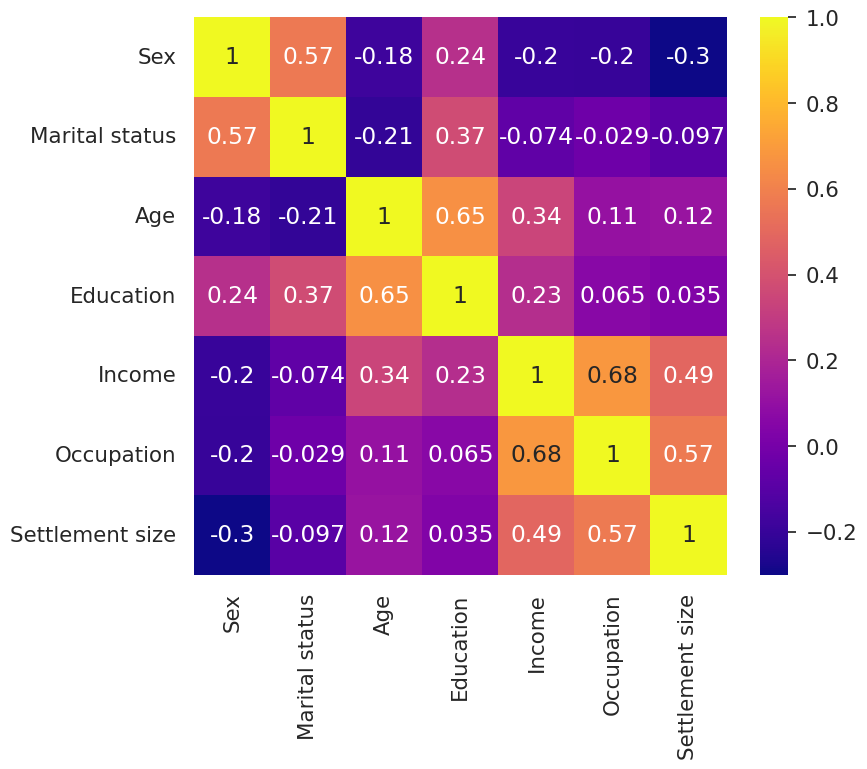

In [ ]:
cor = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
 7   cluster_column   2000 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 117.3 KB


In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip #for k-medoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.1/740.1 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0.dev0-cp310-cp310-linux_x86_64.whl size=1969425 sha256=c5577297e906ed5741d375fd09f4fcc6990f88f54277b1bd651f84065601e274
  Stored in directory: /tmp/pip-ephem-wheel-cache-kja88fvb/wheels/af/c8/e0/4337b9076bf33d4114ac7db3b47f22b910adfb5526174fa630
Successfully built scikit-learn-extra


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'Average Within-Cluster Squared Distances')

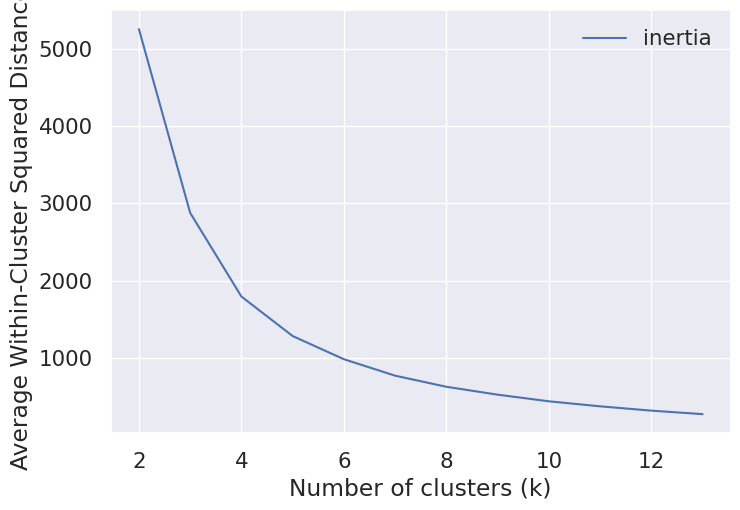

In [ ]:
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_scaled)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')

In [ ]:
kmedoids = KMedoids(n_clusters=2).fit(df_scaled)
df['cluster'] = kmedoids.labels_

In [ ]:
centers = pd.DataFrame(kmedoids.cluster_centers_, columns=df.columns)

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.scatterplot(x='Age', y='Income', hue='cluster', style='cluster', ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='Age', y='Income', ax=ax, s=50, color='black')

ValueError: ignored

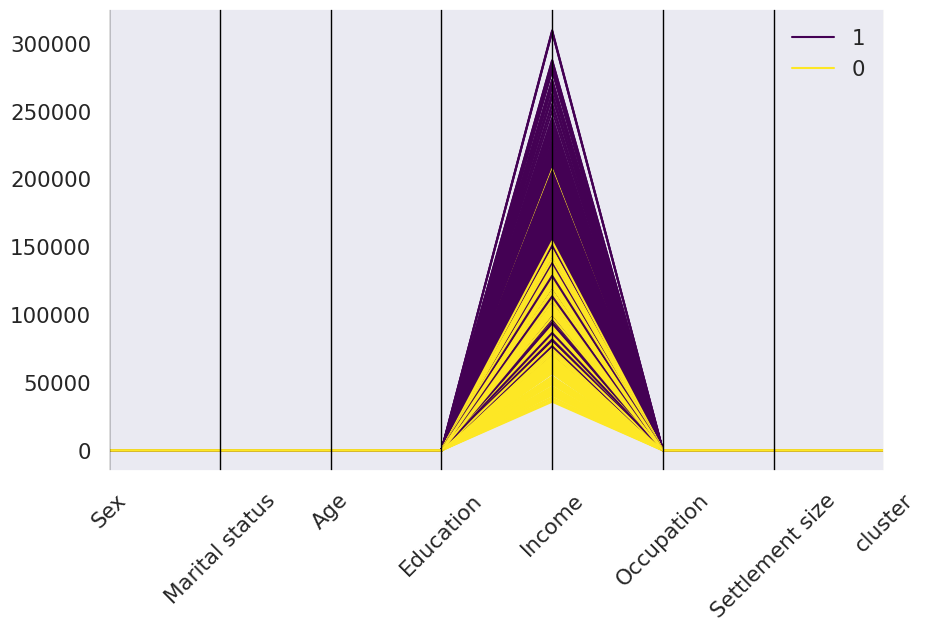

In [ ]:
km = KMeans(n_clusters=2)
km.fit(df_scaled)
df['cluster_column'] = km.labels_

plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'cluster_column', colormap='viridis')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

TypeError: ignored

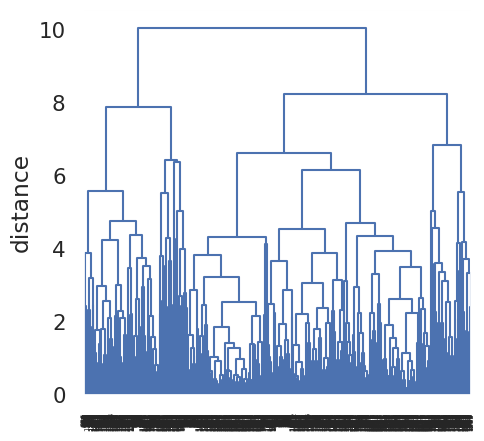

In [ ]:
Z = linkage(df_scaled, method='complete')

fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=df.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

num_clusters = 4
memb = fcluster(Z, num_clusters, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
    print(f"{key} : {', '.join(item.index)}")

In [ ]:
for x in range(2, 14):
    km = KMeans(n_clusters=x)
    km.fit(df_scaled)
    df['cluster_column'] = km.labels_
    silhouette_avg = silhouette_score(df_scaled, df['cluster_column'])
    df = df.drop('cluster_column', axis=1)
    print(f"Silhouette Score: {silhouette_avg}, No. of Clusters = {x}")

Silhouette Score: 0.38690162238012166, No. of Clusters = 2
Silhouette Score: 0.37343407904082104, No. of Clusters = 3
Silhouette Score: 0.3097278560529985, No. of Clusters = 4
Silhouette Score: 0.250897286689942, No. of Clusters = 5
Silhouette Score: 0.2792754438600929, No. of Clusters = 6
Silhouette Score: 0.2740948615073567, No. of Clusters = 7
Silhouette Score: 0.2834582860009694, No. of Clusters = 8
Silhouette Score: 0.3094746771399609, No. of Clusters = 9
Silhouette Score: 0.31524793378014926, No. of Clusters = 10
Silhouette Score: 0.3340129275623919, No. of Clusters = 11
Silhouette Score: 0.33802824492839867, No. of Clusters = 12
Silhouette Score: 0.3515358291273484, No. of Clusters = 13
